In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels
from collections import Counter
import cpi
import datetime
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
dataset_original = pd.read_csv('./tmdb-box-office-prediction/train.csv')
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [3]:
dataset_original.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
dataset_original.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0112346,en,The Three Musketeers,A lawyer defends her father accused of war cri...,NaN,...,9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Three Musketeers,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe430bc3a36847f8036677', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [5]:
# Missing values 
dataset_original.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [6]:
dataset = dataset_original.copy()

def fix_date(date):
    x = pd.to_datetime(date, format="%m/%d/%y")
    if x.year > 2020:
        year = x.year - 100
    else:
        year = x.year
    return datetime.datetime(year,x.month,x.day)

dataset["release_date"] = dataset_original["release_date"].apply(fix_date)

def adjust_price_to_inflation(price, date):
    return int(cpi.inflate(price, date.year))

dataset["budget"] = dataset.apply(lambda x: adjust_price_to_inflation(x["budget"], x["release_date"]), axis=1)
dataset["revenue"] = dataset.apply(lambda x: adjust_price_to_inflation(x["revenue"], x["release_date"]), axis=1)


In [7]:
dataset.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",15101018,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",13283126
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",54135944,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",128775114
2,3,NaN,3563750,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",14138371
3,4,NaN,1336221,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",17816284
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",4676071


<Figure size 1440x864 with 0 Axes>

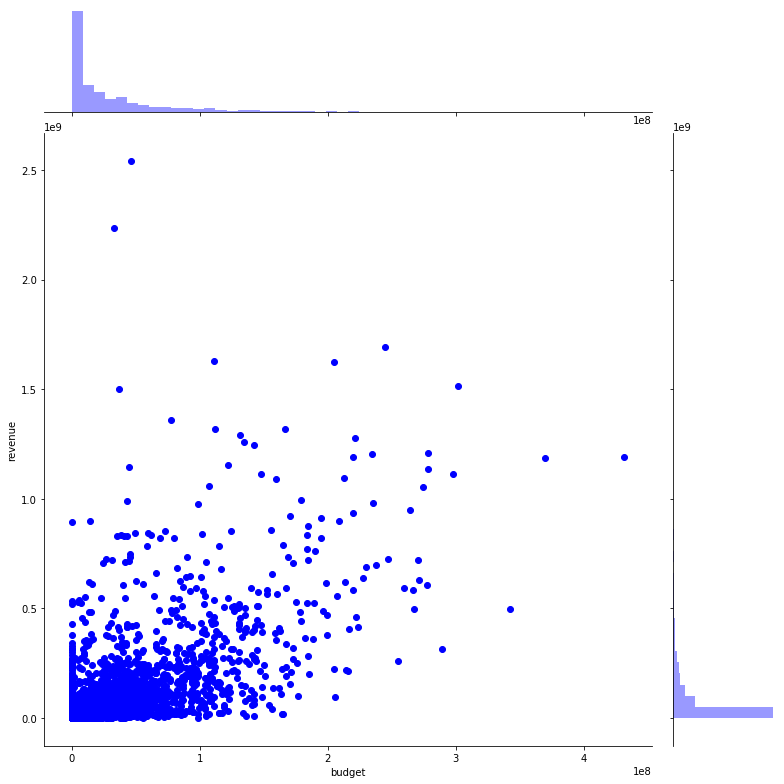

In [8]:
plt.figure(figsize=(20,12))
sns.jointplot(x="budget", y="revenue", data=dataset, height=11, color="b")
plt.show()

Na wykresie wykresu dochodów filmu do jego budżetu możemy zaobserować, że większość filmów posiada budżet poniżej 100 milionów dolarów oraz że większość dochodów mieści się poniżej tego samego progu.
Nie obserwujemy wyraźnej zależności między tymi zmiennymi

<Figure size 1440x864 with 0 Axes>

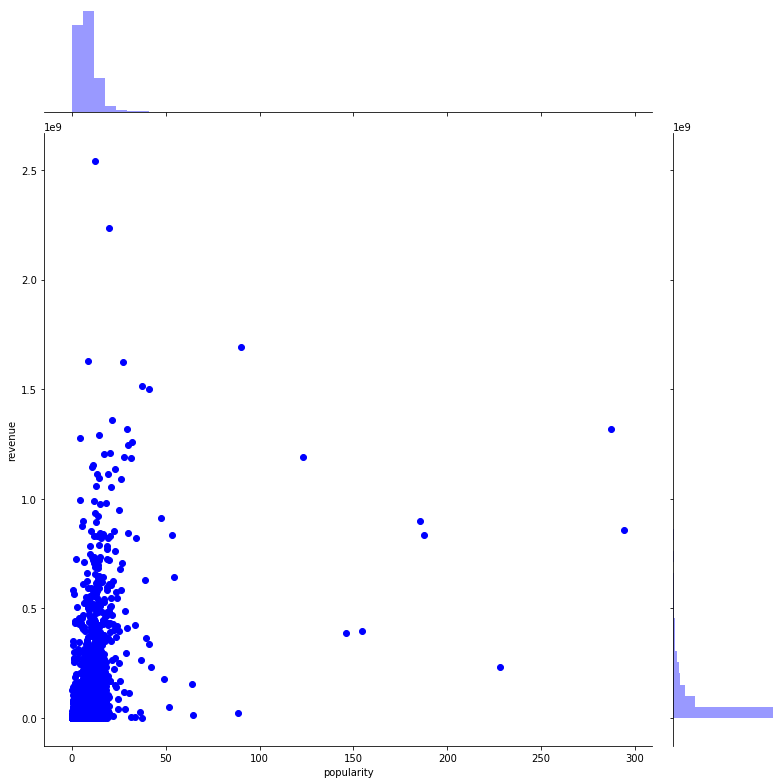

In [9]:
plt.figure(figsize=(20,12))
sns.jointplot(x="popularity", y="revenue", data=dataset, height=11, color="b")
plt.show()

Na wykresie dochodów do popularności filmu zaskakujący jest brak jest wyraźnej zależności między tymi zmiennymi

<Figure size 1440x864 with 0 Axes>

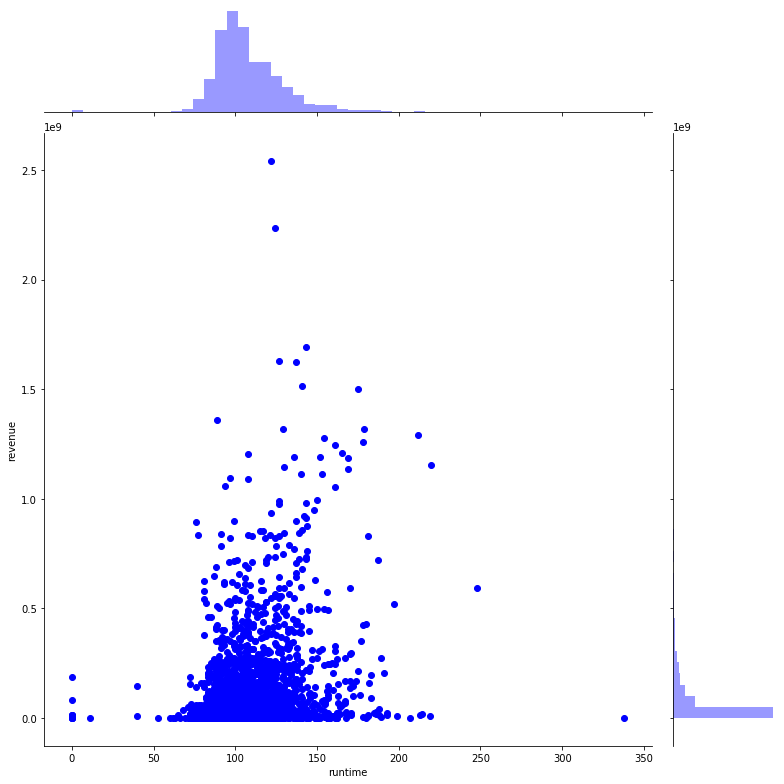

In [10]:
plt.figure(figsize=(20,12))
sns.jointplot(x="runtime", y="revenue", data=dataset, height=11, color="b")
plt.show()

Na wykresie dochodów do czasu trwania filmu widzimy, że większość filmów trwa około 100 minut. Brak jednak wyraźnej zależności poniędzy zmiennymi

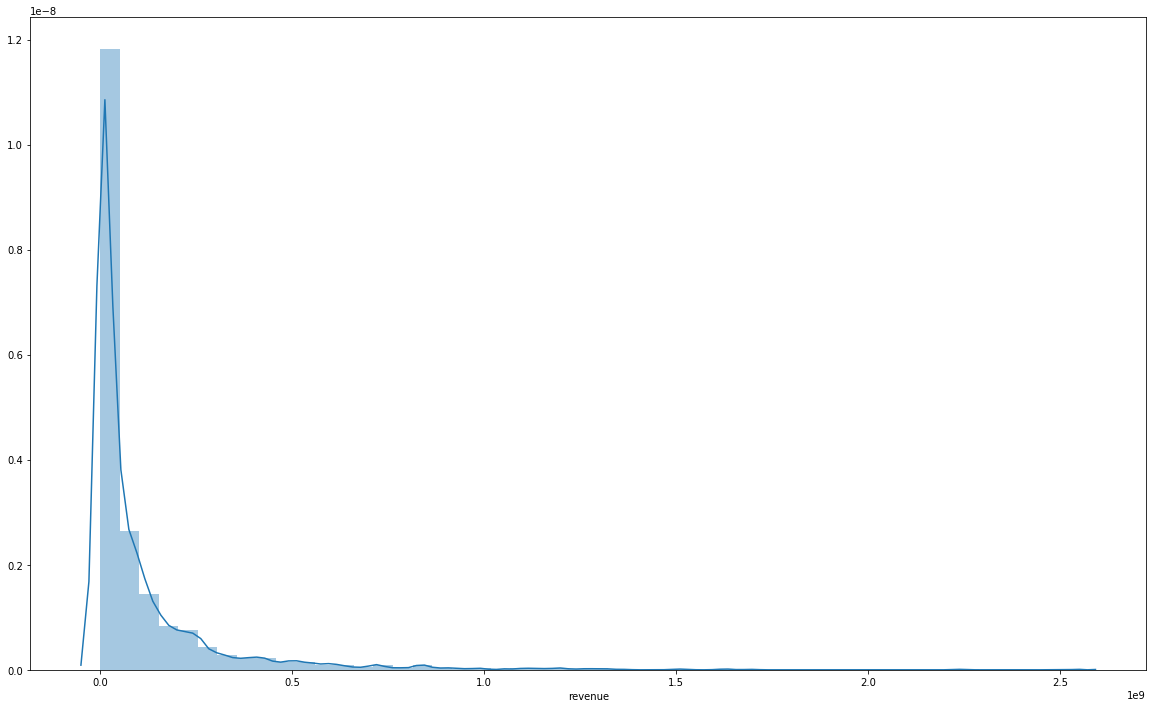

In [11]:
plt.figure(figsize=(20,12))
sns.distplot(dataset.revenue)

Na wykresie dystrybucji dochodu obserwujemy, że większość dochodów filmów mieści się poniżej 500 milionów dolarów

In [12]:
print("Oldest: ", dataset["release_date"].min())
print("Newest: ", dataset["release_date"].max())

Oldest:  1921-01-21 00:00:00
Newest:  2017-07-20 00:00:00


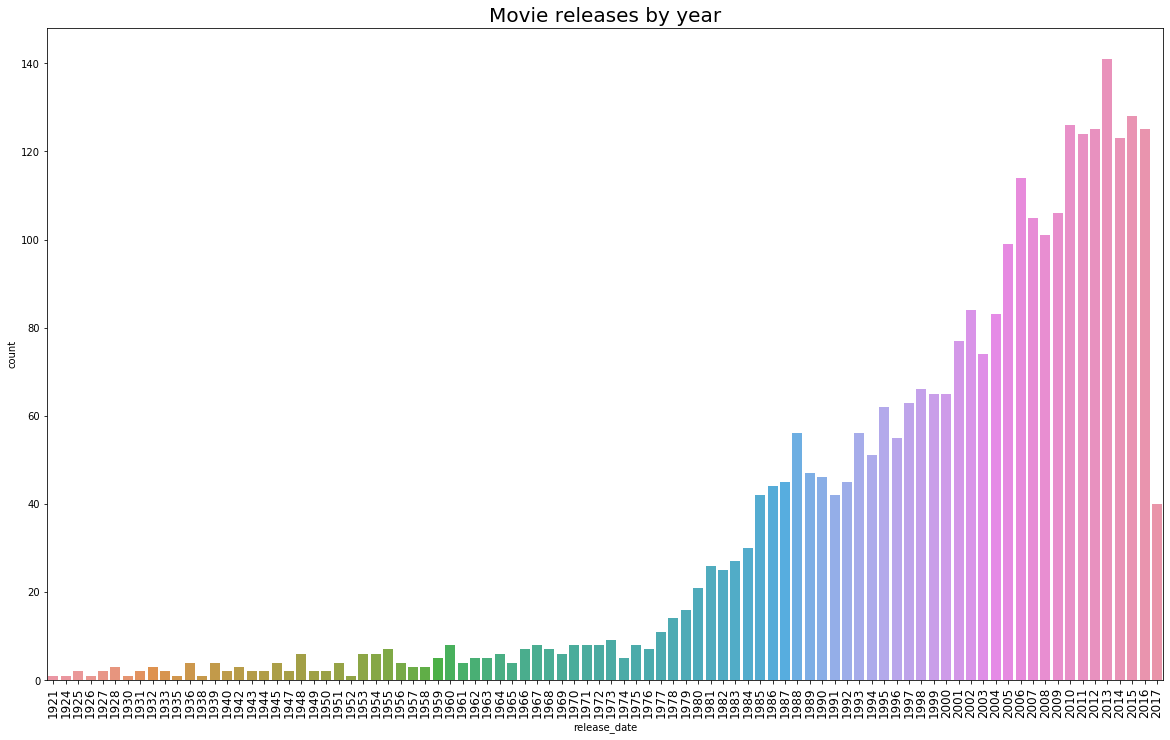

In [13]:
plt.figure(figsize=(20,12))
sns.countplot(dataset['release_date'].dt.year.sort_values())
plt.title("Movie releases by year",fontsize=20)
plt.xticks(fontsize=12,rotation=90)
plt.show()

Nasz zbiór danych posiada więcej filmów z lat współczesnych

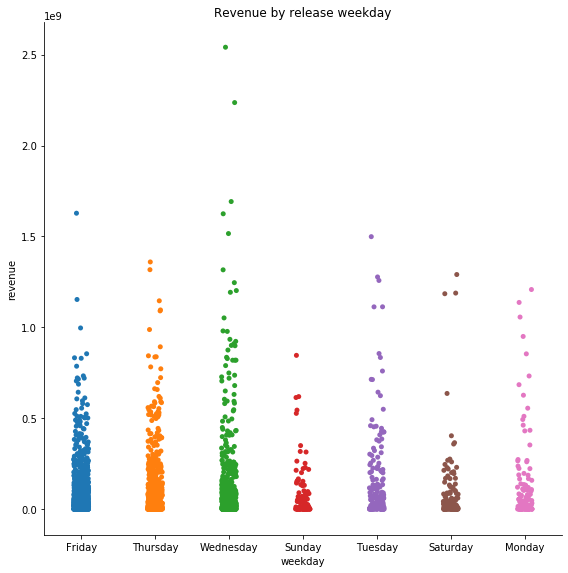

In [14]:
temp = dataset[dataset.revenue != 0]
temp['weekday'] = temp[['release_date']].apply(lambda x: datetime.datetime.strftime(x['release_date'], '%A'), axis=1)

sns.catplot(x='weekday', y='revenue', data=temp, height=8)
plt.title("Revenue by release weekday")
plt.show()

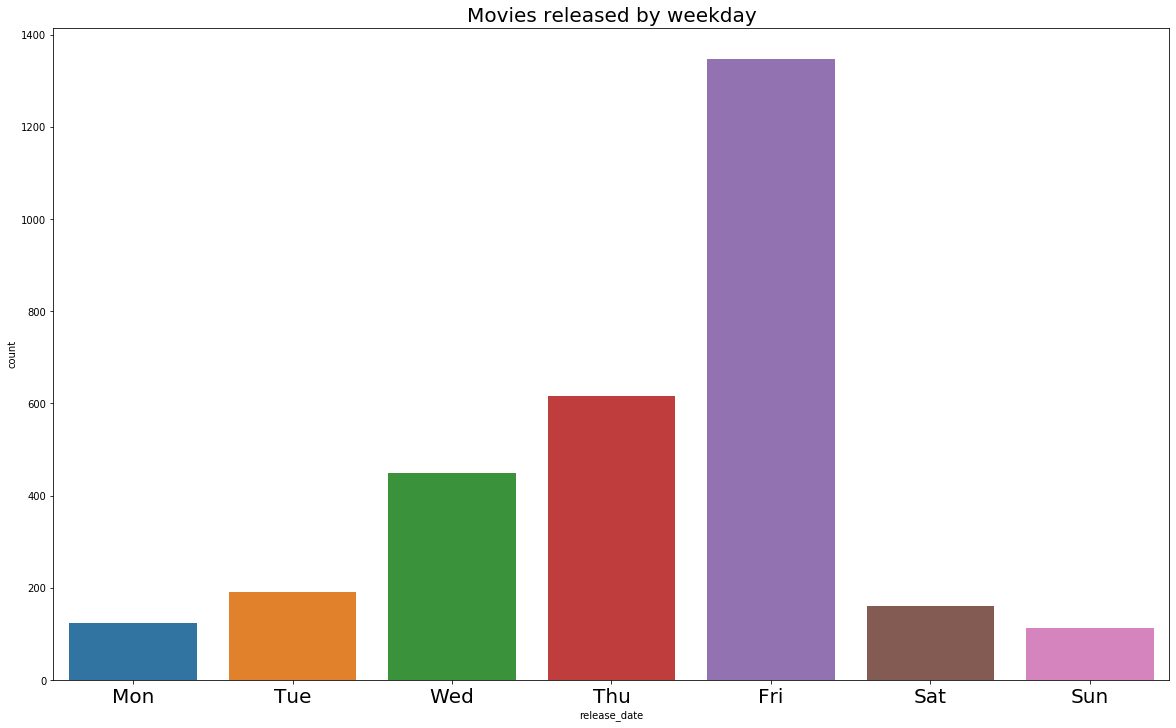

In [15]:
plt.figure(figsize=(20,12))
sns.countplot(dataset['release_date'].dt.weekday.sort_values())
plt.title("Movies released by weekday",fontsize=20)
loc, _ = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

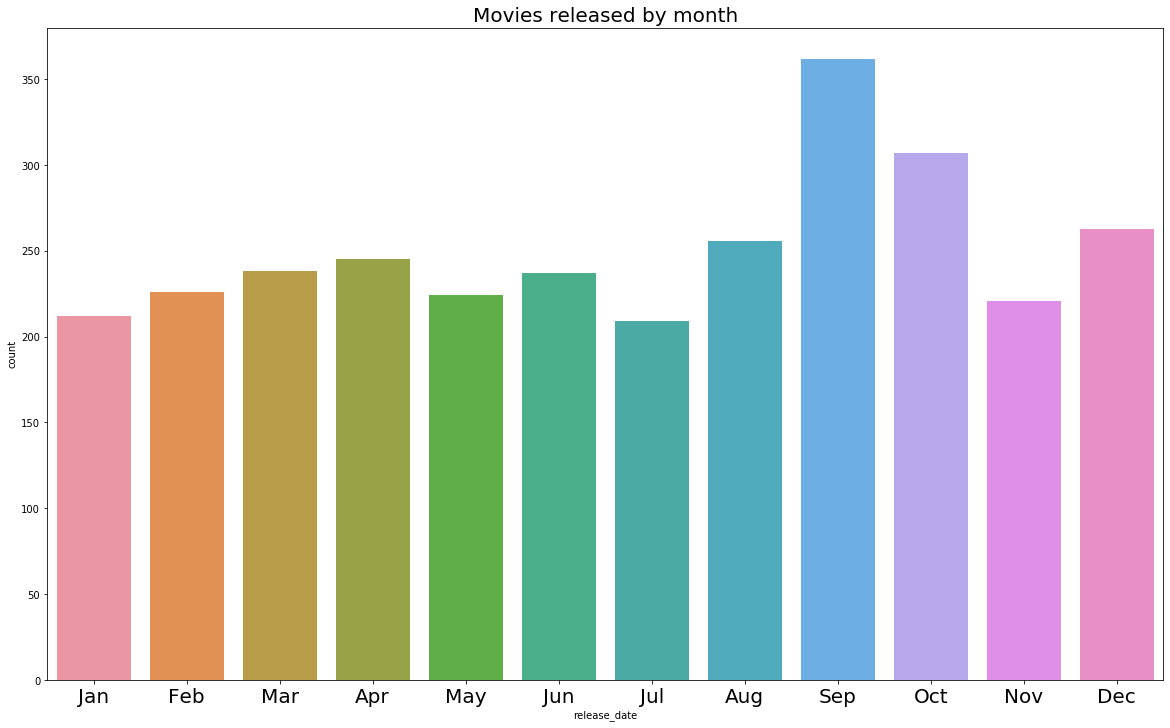

In [16]:
plt.figure(figsize=(20,12))
sns.countplot(dataset['release_date'].dt.month.sort_values())
plt.title("Movies released by month",fontsize=20)
loc, _ = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

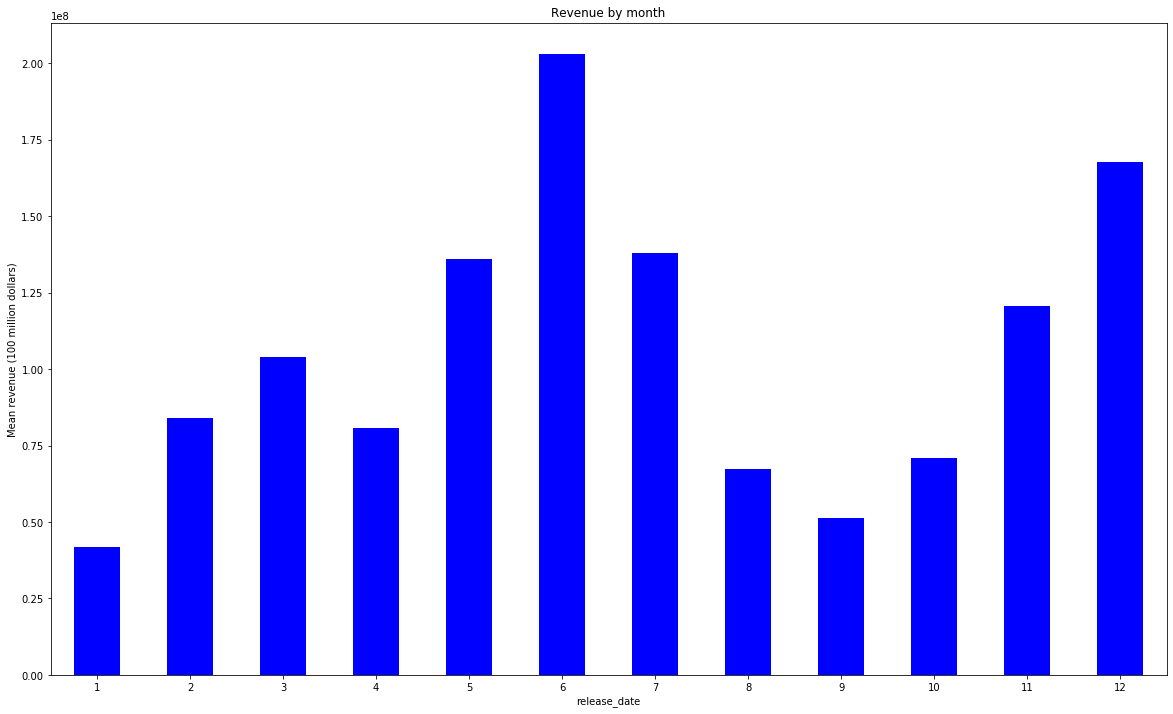

In [17]:
plt.figure(figsize=(20,12))
dataset.groupby(dataset["release_date"].dt.month).agg('mean')['revenue'].plot(kind='bar',color='b',rot=0)
plt.ylabel('Mean revenue (100 million dollars)')
plt.title("Revenue by month")
plt.show()

In [18]:
import ast
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
dfx = text_to_dict(dataset)
temp = dataset.copy()
for col in dict_columns:
       temp[col]=dfx[col]

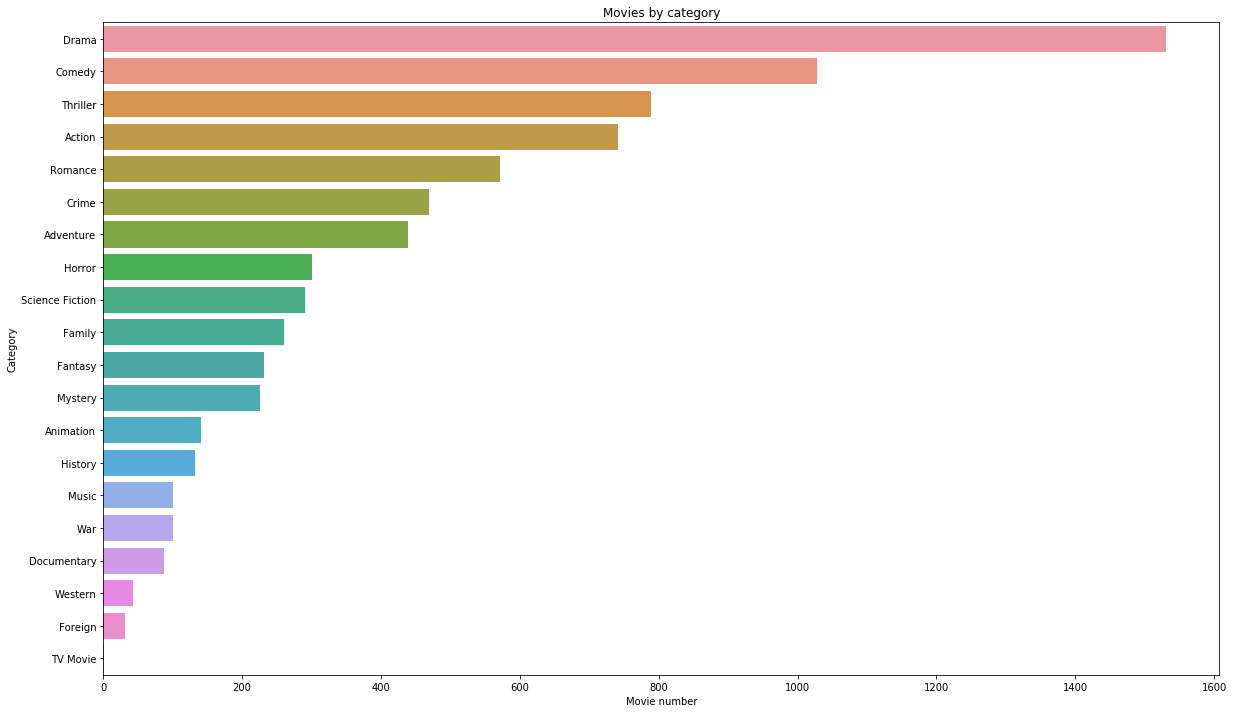

In [19]:
plt.figure(figsize=(20,12))
genre=temp['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
count=Counter([i for j in genre for i in j]).most_common(20)
sns.barplot([val[1] for val in count],[val[0] for val in count])
plt.title("Movies by category")
plt.xlabel("Movie number")
plt.ylabel("Category")
plt.show()

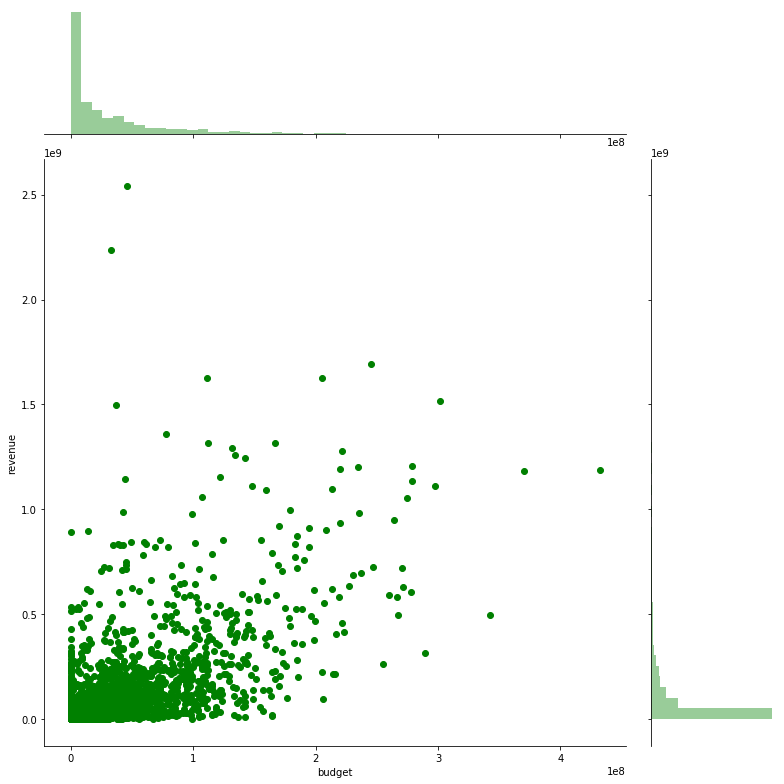

In [20]:
sns.jointplot(x="budget", y="revenue", data=dataset, height=11, ratio=4, color="g")
plt.show()


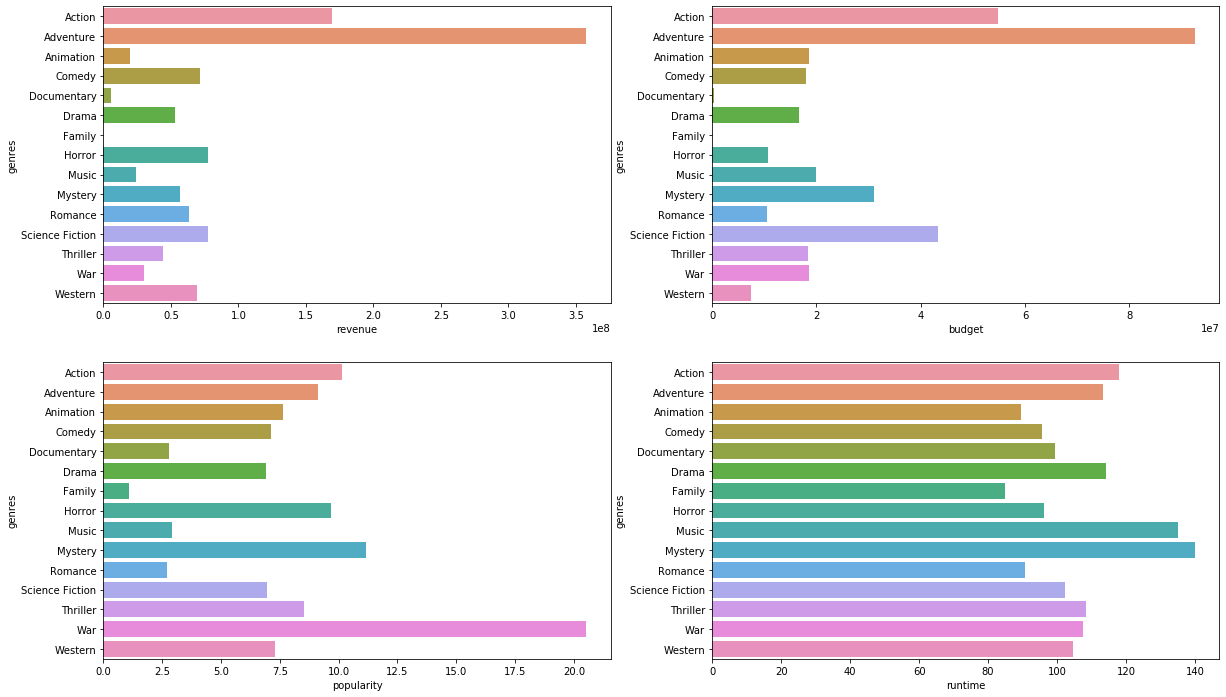

In [21]:
genres=dataset.loc[dataset['genres'].str.len()==1][['genres','revenue','budget','popularity','runtime']].reset_index(drop=True)
genres['genres']=genres.genres.apply(lambda x :x[0]['name'])
genres=genres.groupby(genres.genres).agg('mean')
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(genres['revenue'],genres.index)

plt.subplot(2,2,2)
sns.barplot(genres['budget'],genres.index)

plt.subplot(2,2,3)
sns.barplot(genres['popularity'],genres.index)

plt.subplot(2,2,4)
sns.barplot(genres['runtime'],genres.index)
plt.show()

In [24]:
oscars = pd.read_csv('./tmdb-box-office-prediction/the_oscar_award.csv')
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 497.5+ KB


In [26]:
oscars.head(50)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
8,1927,1928,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,False
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True


In [41]:
oscars_winners = oscars[oscars["winner"] == True].drop(columns=["winner"])
oscars_winners = oscars_winners[oscars_winners["film"].notnull()]
oscars_winners

,year_film,year_ceremony,ceremony,category,name,film
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise
...,...,...,...,...,...,...
10366,2019,2020,92,SOUND EDITING,Donald Sylvester,Ford v Ferrari
10374,2019,2020,92,SOUND MIXING,Mark Taylor and Stuart Wilson,1917
10379,2019,2020,92,VISUAL EFFECTS,"Guillaume Rocheron, Greg Butler and Dominic Tuohy",1917
10382,2019,2020,92,WRITING (Adapted Screenplay),Screenplay by Taika Waititi,Jojo Rabbit


In [46]:
dataset_lc = dataset.copy()
oscars_winners_lc = oscars_winners.copy()
dataset_lc['title'] = dataset_lc['title'].str.lower()
oscars_winners_lc['film'] = oscars_winners_lc['film'].str.lower()

merged_inner = pd.merge(left=dataset_lc, right=oscars_winners_lc, left_on='title', right_on='film')
merged_inner

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Keywords,cast,crew,revenue,year_film,year_ceremony,ceremony,category,name,film
0,3,{},3563750,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",14138371,2014,2015,87,ACTOR IN A SUPPORTING ROLE,J.K. Simmons,whiplash
1,3,{},3563750,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",14138371,2014,2015,87,FILM EDITING,Tom Cross,whiplash
2,3,{},3563750,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",14138371,2014,2015,87,SOUND MIXING,"Craig Mann, Ben Wilkins and Thomas Curley",whiplash
3,11,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",4493093,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,...,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",526748435,1976,1977,49,DIRECTING,John G. Avildsen,rocky
4,11,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",4493093,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,...,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",526748435,1976,1977,49,FILM EDITING,"Richard Halsey, Scott Conrad",rocky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2968,"[{'id': 387219, 'name': 'The Hustler Collectio...",17100802,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0054997,en,The Hustler,Fast Eddie Felson is a small-time pool hustler...,9.333533,...,"[{'id': 236, 'name': 'suicide'}, {'id': 395, '...","[{'cast_id': 15, 'character': 'Eddie Felson', ...","[{'credit_id': '52fe4297c3a36847f802a989', 'de...",64983050,1961,1962,34,CINEMATOGRAPHY (Black-and-White),Eugen Shuftan,the hustler
515,2970,{},28582770,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,tt0280707,en,Gosford Park,"Multiple storylined drama set in 1932, showing...",14.101101,...,"[{'id': 964, 'name': 'servant'}, {'id': 10594,...","[{'cast_id': 2, 'character': 'Mrs. Wilson', 'c...","[{'credit_id': '52fe4401c3a36847f807ceab', 'de...",126679478,2001,2002,74,WRITING (Screenplay Written Directly for the S...,Written by Julian Fellowes,gosford park
516,2993,{},16978824,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0015400,en,The Thief of Bagdad,A recalcitrant thief vies with a duplicitous M...,3.878515,...,"[{'id': 255, 'name': 'male nudity'}, {'id': 14...","[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'credit_id': '52fe45bec3a368484e06c70b', 'de...",18148357,1940,1941,13,ART DIRECTION (Color),Vincent Korda,the thief of bagdad
517,2993,{},16978824,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0015400,en,The Thief of Bagdad,A recalcitrant thief vies with a duplicitous M...,3.878515,...,"[{'id': 255, 'name': 'male nudity'}, {'id': 14...","[{'cast_id': 3, 'character': 'The Thief of Bag...","[{'credit_id': '52fe45bec3a368484e06c70b', 'de...",18148357,1940,1941,13,CINEMATOGRAPHY (Color),Georges Périnal,the thief of bagdad


In [22]:
# pca = PCA()
# X_pca = pca.fit_transform(array)
# X_pca.shape
# 